<IPython.core.display.Javascript object>


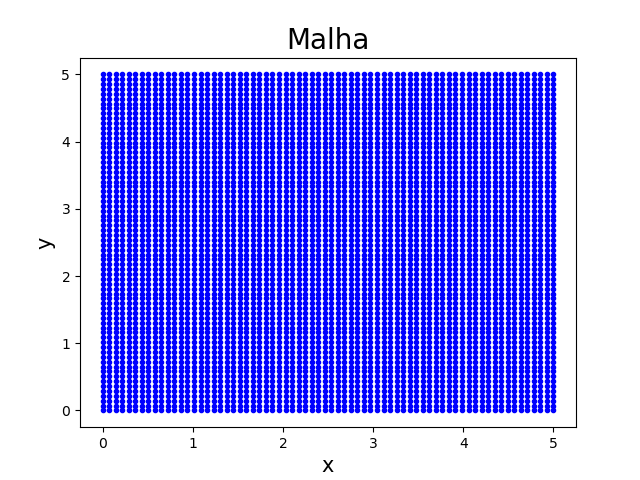

<IPython.core.display.Javascript object>


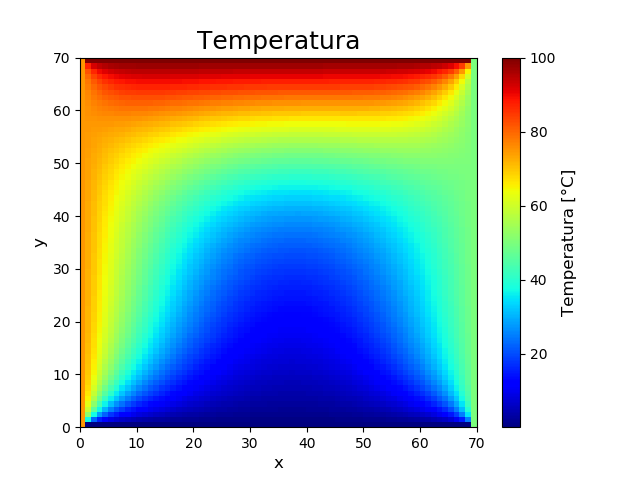

<IPython.core.display.Javascript object>


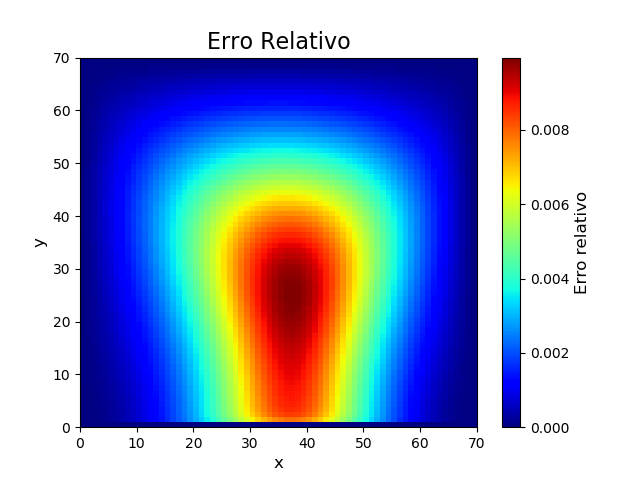

<IPython.core.display.Javascript object>


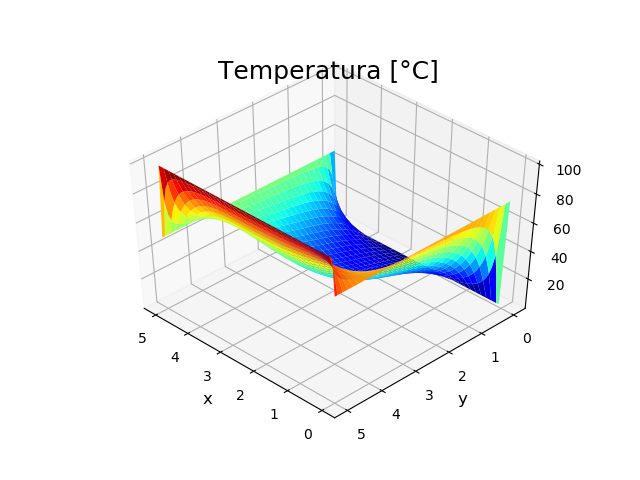

<IPython.core.display.Javascript object>


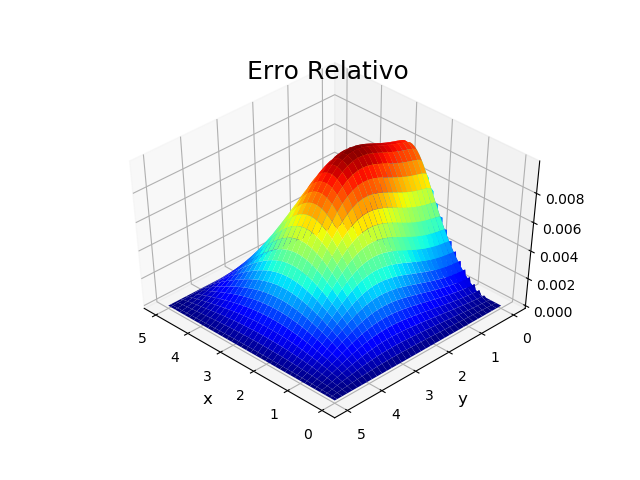

Text(0.5,0.92,'Erro Relativo')

In [10]:
% matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib
from mpl_toolkits.mplot3d import Axes3D


# Dimensão da Malha
n = 70

# Limite Superior do Erro
Lim = 1.0E-2



#################   MALHA   #################

X = Y = np.linspace(0, 5.0, n)
#X = np.arange(-1., 10.0, .1) 
#Y = np.arange(-1., 5.0, .1)



#################   CONDIÇÕES DE CONTORNO   #################

T = np.zeros([len(Y),len(X)])


# Entrada do usuário (opcional)
#Tinf =  float(input("Temperatura no lado esquerdo: "))
#Tsup =  float(input("Temperatura no lado direito: "))
#Tdir =  float(input("Temperatura no lado superior: "))
#Tesq =  float(input("Temperatura no lado inferior: "))


T[0,  :] = Tinf = 0.1#Tinf
T[-1, :] = Tsup = 100#Tsup
T[:, -1] = Tdir = 50#Tdir
T[:,  0] = Tesq = 75#Tesq



#################   SOLUÇÃO   #################

# Sobrerrelaxação
lamb = 1.5

# Auxiliares para o cálculo do erro relativo
erro = np.zeros([len(X),len(Y)]) + 100 # matriz erro inicializada com 100 em todas as posições
erro[0,  :] = 0 # Como os erros nos contornos nunca mudam,  se  não forem definidos como 0 o loop (while) será infinito.
erro[-1, :] = 0
erro[:, -1] = 0
erro[:,  0] = 0

# Matriz auxiliar para T
Taux = np.zeros(T.shape)

# Auxiliares para contagem de iterações
iterac = 0
loops = 0

# Auxiliares para a contagem do tempo
t1 = time.clock()

while np.any(erro > Lim):
    for i in range(1,len(X)-1):
        for j in range(1,len(Y)-1):
            Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
            T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            
            erro[i,j] = abs( (T[i,j] - Taux[i,j])/T[i,j]) # Cálculo do erro relativo em cada posição
            Taux[i,j] = T[i,j]
            loops += 1
    iterac += 1

t2 = time.clock()

# Tempo arredondado para 4 casas decimais
Tempo =  np.round(t2-t1, 4) 

# Limite arredondado e em porcentagem
Lim_por = np.round(Lim*100, 7) 

arquivo = 'Graficos Iterativo/' + 'n_' +str(n) + '--limite_' +str(Lim_por)


with open("Graficos Iterativo/dados.txt", "a") as f:
    print("***********************************************************", file=f)
    print("              Imagem salva: ", arquivo, file=f)
    print("         Dimensão da malha:", n, "linhas/colunas", file=f)
    print("   Limite superior do erro:", Lim_por, "%", file=f)
    print ("                 Iterações:", iterac, file=f)
    print ("           Pontos iterados:", loops, file=f)
    print(" Tempo de Iteração (clock):",Tempo , "segundos \n", file=f)
    f.close()



#################   PLOTS 2D   #################


###### Plot Malha

xx, yy = np.meshgrid(X, Y, sparse=False)

malha, ax_m = plt.subplots()
plt.plot(xx, yy, 'b.')
plt.title('Malha', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
malha.savefig(arquivo + '--malha.pdf')
#plt.show()



### Plot 2D

#plt.figure(2)
fig2D, ax2D = plt.subplots() # Cria a figura com um subplot
pcolor(T, cmap='jet')
cbar = colorbar()
ax2D.set_title('Temperatura', fontsize=18)
cbar.ax.set_ylabel('Temperatura [°C]', fontsize=12)
ax2D.set_xlabel('x', fontsize=12)
ax2D.set_ylabel('y', fontsize=12)
fig2D.savefig(arquivo + '--temperatura.pdf')
#plt.show()



### Plot Erro

fig2, ax2 = plt.subplots()
pcolor(erro, cmap='jet')  
cbar = colorbar()

cbar.ax.set_ylabel('Erro relativo', fontsize=12)
ax2.set_title('Erro Relativo', fontsize=16)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
fig2.savefig(arquivo + '--erro.pdf')
#plt.show()



#################   PLOTS 3D   #################

### Temperatura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ZT = T.reshape(xx.shape)

ax.plot_surface(xx, yy, ZT, cmap='jet')
ax.view_init(azim=135, elev=45) # Rotação do plot
#cbar.ax.set_ylabel('Temperatura', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Temperatura [°C]', fontsize=18)



### Erro Relativo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ZE = erro.reshape(xx.shape)

ax.plot_surface(xx, yy, ZE, cmap='jet')
ax.view_init(azim=135, elev=45)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Erro Relativo', fontsize=18)

